In [1]:
import pandas as pd
import numpy as np
import math
import sys
import random
from pivottablejs import pivot_ui
import sklearn
from random import sample
from sklearn.neighbors import NearestNeighbors
import json

In [2]:
# Pearson Score
# ------------------------------------------------------------------------------------------------------------------
def pearson_calc(numbers_x, numbers_y):
    mean_x = 0.000
    mean_y = 0.000
    if(len(numbers_y)==0 and len(numbers_x)==0):
        mean_x = sum(numbers_x)/0.001
        mean_y = sum(numbers_y)/0.001
    elif(len(numbers_x)==0):
        mean_x = sum(numbers_x)/0.001
        mean_y = sum(numbers_y)/len(numbers_y)
    elif(len(numbers_y)==0):
        mean_x = sum(numbers_x)/len(numbers_x)
        mean_y = sum(numbers_y)/0.001
    else:
        mean_x = sum(numbers_x)/len(numbers_x)
        mean_y = sum(numbers_y)/len(numbers_y)
    
    subtracted_mean_x = [i - mean_x for i in numbers_x]
    subtracted_mean_y = [i - mean_y for i in numbers_y]

    x_times_y = [a * b for a, b in list(zip(subtracted_mean_x, subtracted_mean_y))]

    x_squared = [i * i for i in numbers_x]
    y_squared = [i * i for i in numbers_y]
    
    N = sum(x_times_y)
    D = math.sqrt(sum(x_squared) * sum(y_squared))
    if (D !=0):
        return N/D
    else:
        return N/0.001

In [3]:
def match_cal(user1,user2):
    match = 0
    df_u1 = user1.values.tolist()
    df_u2 = user2.values.tolist()
    df_u1 =  [y for x in df_u1 for y in x] 
    df_u2 =  [y for x in df_u2 for y in x] 
    for i in range(0,len(df_u2)):
        if(df_u2[i]==1 and df_u1[i]==1):
            match=match+1
        else:
            match=match+0.001
#     print('match',match)
    pearson_correlation_val = pearson_calc(df_u1,df_u2)
    return match,pearson_correlation_val

In [4]:
def pearson_score(user1,user2):
    '''
    user1 & user2 : user ids of two users between which similarity score is to be calculated.
    '''
    # A list of categories joined by both the users.
    both_match_count, score = match_cal(user1,user2)
    
#     print('both matches :',both_match_count)
    # Returning '0' if no common values.
    if both_match_count == 0 :
        return 0
    return score

In [5]:
def find_k_neighbours(df,k):
    order = np.argsort(df.values, axis=1)[:, :k]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False).iloc[:k].index, index=['top{}'.format(i) for i in range(1, k+1)]), axis=1)
    return df

In [6]:
def weighted_average_over_scores(score,weights):
    L = len(score)
    weighted_sum = 0.000
    values_weighted_sum = 0.000
    weight_list_gen = []
    for i in range(0,L):
        total_weight = score[i] * weights[i]
#         print('total_weight :',total_weight)
        weight_list_gen.append(total_weight)
    for i in range(L):
#         weighted_sum = weighted_sum + weight_list_random_gen[i - 1]
        weighted_sum = weighted_sum + weight_list_gen[i - 1]
    for i in range(L):
        weight_list_gen.append(score[i - 1] * weight_list_gen[i - 1])
    for i in range(len(weight_list_gen)):
        values_weighted_sum = values_weighted_sum + weight_list_gen[i - 1]
#     if(weighted_sum == 0):
    if(int(weighted_sum) ==0):
#         print("Something is wrong!")
        return values_weighted_sum / 0.001
    else:
        return values_weighted_sum / weighted_sum

In [7]:
def gbellmf(x):
#     print("x :",x)
#     Generalized Bell function fuzzy membership generator
#     Parameters
#     ----------
#     x : 1d array
#         Independent variable.
#     a : float
#         Bell function parameter controlling width. See Note for definition.
#     b : float
#         Bell function parameter controlling center. See Note for definition.
#     c : float
#         Bell function parameter controlling slope. See Note for definition.

    return 1.00 / (1.00 + np.abs((x - 0.001) / 0.001) ** (2 * 0.001))

In [8]:
# ------------------------------------------------------------------------------------------------------------------

In [9]:
data_users = pd.read_csv('user_cat.csv',index_col=0)
data_users.head()

C:\Users\tusha\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,member_id,category_id,group_id,rating
0,3,2,490552,4.67
1,210,2,490552,4.67
2,357518,2,490552,4.67
3,511008,2,490552,4.67
4,915553,2,490552,4.67


In [10]:
data_users.size

12511788

In [11]:
data_users.shape

(3127947, 4)

In [12]:
tester = data_users.sample(n=1000).copy()
tester.head()

,member_id,category_id,group_id,rating
284030,96657752,34,1730008,4.49
587629,58958752,34,4268012,4.68
2333334,117588002,21,18475971,4.75
974358,16982591,21,224169,4.89
1656714,208370945,12,18867769,4.92


In [13]:
tester.shape

(1000, 4)

In [14]:
# Creating a pivot table based on above random subset of data

In [15]:
tester['values']=1

In [16]:
# Checking if the dataset for values
tester.head()

,member_id,category_id,group_id,rating,values
284030,96657752,34,1730008,4.49,1
587629,58958752,34,4268012,4.68,1
2333334,117588002,21,18475971,4.75,1
974358,16982591,21,224169,4.89,1
1656714,208370945,12,18867769,4.92,1


In [17]:
df_pivot = tester.pivot_table(index=['member_id'], columns=['category_id'],values='values').fillna(0)
df_pivot.head()

category_id,1,2,4,5,6,8,9,10,11,12,...,26,27,28,29,30,31,32,33,34,36
member_id,,,,,,,,,,,,,,,,,,,,,
233986,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
237578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
453232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
522395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
863859,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# pivot_ui(df_pivot,rows=['member_id'], cols=['category_id'],outfile_path="./data_json/members_category_pivot.html")

In [19]:
# Shape of the pivot table
df_pivot.shape

(994, 30)

In [20]:
score_per_user_match = []
member_vals = []
index_list = []
for index,row in df_pivot.iterrows():
    index_list.append(index)

In [21]:
# Displaying all the members in the above pivot table
print(len(index_list))

994


In [22]:
scores = []
members1 = []
members2 = []
result = []
for i in range(0,len(index_list)):
#     print('user 1 --',user1)
    members1.append(index_list[i])
    user1 = df_pivot.iloc[i:i+1]
    for j in range(0,len(index_list)):
        user2 = df_pivot.iloc[j:j+1]
#         print('user 2 --',user2)
        score = pearson_score(user1,user2)
        scores.append(score)
        members2.append(index_list[j])
        list_add = []
        list_add.append(index_list[i])
        list_add.append(index_list[j])
        list_add.append(score)
        result.append(list_add)

In [23]:
checking = pd.DataFrame(result, columns = ['users_A', 'users_B','scores']) 
checking.head()

,users_A,users_B,scores
0,233986,233986,0.966667
1,233986,237578,-0.033333
2,233986,453232,-0.033333
3,233986,522395,-0.033333
4,233986,863859,0.966667


In [24]:
df_pivot_new=checking.pivot_table(index=['users_A'], columns=['users_B'], values = 'scores').fillna(0)
df_pivot_new.head()

users_B,233986,237578,453232,522395,863859,958242,1237529,1324145,1383703,1469074,...,237971401,238093572,238277843,238296455,238438501,238517427,239218914,239545903,239960022,240716785
users_A,,,,,,,,,,,,,,,,,,,,,
233986,0.966667,-0.033333,-0.033333,-0.033333,0.966667,-0.033333,-0.033333,0.966667,-0.033333,-0.04714,...,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333
237578,-0.033333,0.966667,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.04714,...,-0.033333,-0.033333,0.966667,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333
453232,-0.033333,-0.033333,0.966667,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.04714,...,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333
522395,-0.033333,-0.033333,-0.033333,0.966667,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.04714,...,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333
863859,0.966667,-0.033333,-0.033333,-0.033333,0.966667,-0.033333,-0.033333,0.966667,-0.033333,-0.04714,...,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333


In [25]:
# Finding the 3 best suited neighboours for each member in the pivot table which is our user-user matrix

In [26]:
# df_pivot_new.to_json(r'./data_json/user_user_matrix_normal.json')

In [27]:
# pivot_ui(df_pivot_new,rows=['users_A'], cols=['users_B'],outfile_path="./data_json/user_user_pivot.html")

In [28]:
neigh_3 = find_k_neighbours(df_pivot_new,5)
neigh_3.head()

,top1,top2,top3,top4,top5
users_A,,,,,
233986,233986,193430434,22584561,23945412,24380312
237578,95978112,185322743,193816759,19341001,116806382
453232,218675736,8944694,136061852,9778971,5847749
522395,217420488,186424290,522395,69413442,184242795
863859,233986,193430434,22584561,23945412,24380312


In [29]:
user_list = list(neigh_3.index)
user_list = sample(user_list, 5)
print(user_list)

[14146864, 38095662, 119807132, 182536136, 13580488]


<b> Converting the User-List to JSON

In [30]:
# with open('./data_json/user_list.json', 'w') as json_file:
#     json.dump(user_list, json_file)

<b> Converting neirest neigbour matrix to json

In [31]:
# neigh_3.to_json(r'./data_json/neigh_3.json')

In [32]:
# GEtting the user from the "USER_LIST"
selected_user = user_list[1]

In [33]:
# We could iterate over these users to generate all static data

In [34]:
user_val = df_pivot.loc[selected_user:selected_user]

In [35]:
user_val

category_id,1,2,4,5,6,8,9,10,11,12,...,26,27,28,29,30,31,32,33,34,36
member_id,,,,,,,,,,,,,,,,,,,,,
38095662,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# Now we are finding the adjacent members whom the selected user shares the most compatibility with

In [37]:
selected_users_check = []
neigh_3 = neigh_3.loc[selected_user]
for i in neigh_3:
    if(i not in selected_users_check and (i is not None)):
        selected_users_check.append(i)
member_list=[]
for i in range(0,len(selected_users_check)):
    if(selected_user == selected_users_check[i]):
        pass
    else:
        member_list.append(selected_users_check[i])

In [38]:
# All the selected members from the above data - member_list
print(member_list)

[212055239, 226429468, 197346295, 233141347, 234652468]


In [39]:
tester.head()

,member_id,category_id,group_id,rating,values
284030,96657752,34,1730008,4.49,1
587629,58958752,34,4268012,4.68,1
2333334,117588002,21,18475971,4.75,1
974358,16982591,21,224169,4.89,1
1656714,208370945,12,18867769,4.92,1


In [40]:
copy_data = data_users.copy()

In [41]:
copy_data.head()

,member_id,category_id,group_id,rating
0,3,2,490552,4.67
1,210,2,490552,4.67
2,357518,2,490552,4.67
3,511008,2,490552,4.67
4,915553,2,490552,4.67


In [42]:
copy_data.shape

(3127947, 4)

In [43]:
filter_groups_mem_info = copy_data['member_id'].isin(member_list)
copy_data.where(filter_groups_mem_info,inplace=True)
copy_data = copy_data.dropna()
copy_data.head()

,member_id,category_id,group_id,rating
313388,197346295.0,1.0,477112.0,4.58
320222,197346295.0,31.0,1584426.0,4.69
323914,197346295.0,20.0,8663942.0,4.86
327303,197346295.0,20.0,17098922.0,4.85
612517,233141347.0,16.0,22906930.0,0.00


In [44]:
# copy_data.to_json(r'./data_json/groups_of_selected_memebrs.json')

In [45]:
copy_data.shape

(93, 4)

In [46]:
copy_data.head()

,member_id,category_id,group_id,rating
313388,197346295.0,1.0,477112.0,4.58
320222,197346295.0,31.0,1584426.0,4.69
323914,197346295.0,20.0,8663942.0,4.86
327303,197346295.0,20.0,17098922.0,4.85
612517,233141347.0,16.0,22906930.0,0.00


In [47]:
# Fetching all the groups based on the above pulled member-groups

In [48]:
group_list_vals = copy_data['group_id'].to_list()
group_list_vals = set(group_list_vals)
group_list_vals = list(group_list_vals)

In [49]:
print(group_list_vals)

[9303582.0, 18808353.0, 2019371.0, 8641582.0, 21670448.0, 510001.0, 22906930.0, 1948211.0, 1547833.0, 21362748.0, 20777037.0, 3888722.0, 18496605.0, 1209438.0, 19129443.0, 37994.0, 110197.0, 20476539.0, 439939.0, 22079622.0, 17381002.0, 18564750.0, 19540625.0, 23349406.0, 17098922.0, 18499249.0, 19590843.0, 5912252.0, 24356540.0, 17243842.0, 22852805.0, 13780692.0, 1240279.0, 687322.0, 2091231.0, 745184.0, 1540833.0, 25210084.0, 1383148.0, 3514092.0, 2847472.0, 1596153.0, 20199165.0, 18582286.0, 1333016.0, 16041752.0, 21552921.0, 18515227.0, 24426276.0, 1584426.0, 25280819.0, 23258420.0, 24201535.0, 23312704.0, 8446282.0, 21741393.0, 12056402.0, 3959642.0, 20073830.0, 18537319.0, 16450412.0, 23725421.0, 5198702.0, 15499122.0, 1670529.0, 1080706.0, 8663942.0, 495495.0, 23548823.0, 20965785.0, 2806682.0, 19066272.0, 842661.0, 1645494.0, 477112.0, 18576312.0, 1981371.0, 21744062.0, 24016326.0, 893386.0, 18997708.0, 404437.0, 2122721.0, 18511330.0, 14675942.0, 1790963.0, 9513972.0, 2554315

In [50]:
# Randomly selecting 5 groups from the above list

In [51]:
random_5_groups = sample(group_list_vals,10)
print(random_5_groups)

[745184.0, 23349406.0, 1383148.0, 18515227.0, 404437.0, 13780692.0, 3959642.0, 110197.0, 1790963.0, 3888722.0]


In [52]:
groups_all = data_users.copy()

In [53]:
filter_groups_from_rand = groups_all['group_id'].isin(random_5_groups)
groups_all.where(filter_groups_from_rand,inplace=True)
groups_all = groups_all.dropna()
groups_all.shape

(26604, 4)

In [54]:
user_val

category_id,1,2,4,5,6,8,9,10,11,12,...,26,27,28,29,30,31,32,33,34,36
member_id,,,,,,,,,,,,,,,,,,,,,
38095662,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
weighted_score = []
result_groups = []
members1 = []
members2 = []
scores = []
weights = []
groups_to_check = []

In [56]:
for i in range(0,len(random_5_groups)):
    group_value = random_5_groups[i]
    data_users_loop = pd.read_csv('user_cat.csv',index_col=0)
    filer_loop = data_users_loop['group_id'] == group_value
    data_users_loop = data_users_loop.dropna()
    data_users_loop
    
    # Converting the above dataframe to pivot table - User - Category Matrix
    data_users_loop['values']=1
    df_pivot_new = data_users_loop.pivot_table(index=['member_id'], columns=['category_id'], values = 'values').fillna(0)
    
    score_per_user_match = []
    member_vals = []
    index_list = []
    
    # Fetch all the members of this group
    for index,row in df_pivot_new.iterrows():
        index_list.append(index)
    
    # Iterating over the fetched users
    user1 = user_val
    
    
    for j in range(0,len(index_list)):
        user2 = df_pivot.iloc[j:j+1]
        # print('user 2 --',user2)

        score = pearson_score(user1,user2)
        # print("Score : ",score)
        
        scores.append(score)
       
        weights.append(gbellmf(score))    
        
        members1.append(user1)
        members2.append(index_list[j])

        list_add = []
        list_add.append(user1)
        list_add.append(index_list[j])
        # score_list_old.append(score)
        list_add.append(score)
        result_groups.append(list_add)

        # Finding the weighted average
        # print("scores :",scores)
        # print("weights :",weights)

    update = weighted_average_over_scores(scores,weights)
    weighted_score.append(update)

In [57]:
Threshold_val = np.mean(weighted_score)

In [58]:
user_value_selected = list(user_val.index)
user_value_selected = user_value_selected[0]
print(user_value_selected)

38095662


In [59]:
Threshold_val

0.42255449123184896

In [60]:
weighted_score

[0.4225544912321111,
 0.4225544912320802,
 0.42255449123205807,
 0.4225544912318925,
 0.42255449123179434,
 0.42255449123173217,
 0.42255449123171124,
 0.4225544912317058,
 0.4225544912317029,
 0.42255449123170064]

In [61]:
t2 = np.median(weighted_score)

In [62]:
t2

0.42255449123176325

In [63]:
final_result = []
for i in range(0,len(weighted_score)):
    if(weighted_score[i]>=Threshold_val):
        list_final = []
        list_final.append(user_value_selected)
        list_final.append(random_5_groups[i])
        list_final.append(weighted_score[i])
        
        final_result.append(list_final)

In [64]:
final_result

[[38095662, 745184.0, 0.4225544912321111],
 [38095662, 23349406.0, 0.4225544912320802],
 [38095662, 1383148.0, 0.42255449123205807],
 [38095662, 18515227.0, 0.4225544912318925]]

In [65]:
final_df = pd.DataFrame(final_result, columns = ['users_A', 'groups','scores']) 
final_df

,users_A,groups,scores
0,38095662,745184.0,0.422554
1,38095662,23349406.0,0.422554
2,38095662,1383148.0,0.422554
3,38095662,18515227.0,0.422554


In [66]:
df = final_df.pivot_table(index=['users_A'], columns=['groups'], values = 'scores').fillna(0)
df

groups,745184.0,1383148.0,18515227.0,23349406.0
users_A,,,,
38095662,0.422554,0.422554,0.422554,0.422554


<b> Converting all needed data to JSON

In [67]:
# pivot_ui(df,rows=['users_A'], cols=['groups'],outfile_path="./data_json/selected_user_groups_pivot.html")

In [68]:
user_list

[14146864, 38095662, 119807132, 182536136, 13580488]

In [69]:
user_val = user_value_selected

In [70]:
select_memebrs = pd.read_csv("members.csv", encoding = "Latin-1")
filter_m = select_memebrs['member_id'] == user_val
select_memebrs.where(filter_m,inplace=True)
select_memebrs = select_memebrs.dropna()
select_memebrs = select_memebrs[['member_id', 'group_id']]

In [71]:
# select_memebrs

In [72]:
select_memebrs2 = pd.read_csv("groups.csv", encoding = "Latin-1")
merge_tot = pd.merge(select_memebrs,select_memebrs2,on='group_id')
merge_tot = merge_tot[['member_id', 'group_id','category_id']]

In [73]:
# merge_tot

In [74]:
group_fetch = final_df['groups'].to_list()

In [75]:
select_memebrs3 = pd.read_csv("groups.csv", encoding = "Latin-1")
filter_m3 = select_memebrs3['group_id'].isin(group_fetch)
select_memebrs3.where(filter_m3,inplace=True)
select_memebrs3 = select_memebrs3.dropna()
select_memebrs3 = select_memebrs3[['group_id','category_id']]

In [76]:
select_memebrs3

,group_id,category_id
801,745184.0,1.0
1347,1383148.0,8.0
7157,18515227.0,1.0
13056,23349406.0,10.0


In [77]:
class_names = select_memebrs3['category_id'].to_list()
class_names = set(class_names)
class_names = list(class_names)

In [78]:
actual = [1,1,1,1,1]

actual2 = [
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1]]

pred_list = [
    [1,1,1,1,0],
    [1,0,0,1,0],
    [0,0,1,1,1],
    [1,1,0,1,1],
    [1,1,0,1,0],
    [1,1,0,1,0],
    [1,0,1,1,1],
    [1,0,1,1,0],
    [1,1,0,0,1],
    [1,0,1,1,1], # ---
    [1,1,1,1,0],
    [1,0,0,1,0],
    [0,0,1,1,1],
    [1,1,0,1,1],
    [1,1,0,1,0],
    [1,1,0,1,0],
    [1,0,1,1,1],
    [1,0,1,1,0],
    [1,1,0,0,1],
    [1,0,1,1,1]]

In [79]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from pandas_ml import ConfusionMatrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from collections import defaultdict

In [80]:
resources = defaultdict(list)

In [81]:
def evaluate(actual, pred):
    true = actual
    pred = pred

    tn, fp, fn, tp = confusion_matrix(true, pred).ravel()
    p = precision_score(true, pred)
    r = recall_score(true, pred)
    
    f1 = (2*p*r)/(p+r)
    return tn, fp, fn, tp, p ,r , f1

In [82]:
precision = []
recall = []
f1_score = []
accuracy = []
fp_rate = []
TPR =[] 
tn_l = []
fp_l = []
fn_l = []
tp_l = []
for i in range(0,len(pred_list)):
    tn, fp, fn, tp, p ,r , f1 = evaluate(actual, pred_list[i])
    tn_l.append(tn)
    fp_l.append(fp)
    fn_l.append(fn)
    tp_l.append(tp)
    
    precision.append(p)
    recall.append(r)
    f1_score.append(f1)
    acc = (tp+tn)/(tp+tn+fp+fn)
    accuracy.append(acc)
    FP_RATE = fp // (fp+tn)
    tpr = tp//(tp+fn)
    TPR.append(tpr)
    fp_rate.append(FP_RATE)
    print(tn, fp, fn, tp, p ,r , f1)

0 0 1 4 1.0 0.8 0.888888888888889
0 0 3 2 1.0 0.4 0.5714285714285715
0 0 2 3 1.0 0.6 0.7499999999999999
0 0 1 4 1.0 0.8 0.888888888888889
0 0 2 3 1.0 0.6 0.7499999999999999
0 0 2 3 1.0 0.6 0.7499999999999999
0 0 1 4 1.0 0.8 0.888888888888889
0 0 2 3 1.0 0.6 0.7499999999999999
0 0 2 3 1.0 0.6 0.7499999999999999
0 0 1 4 1.0 0.8 0.888888888888889
0 0 1 4 1.0 0.8 0.888888888888889
0 0 3 2 1.0 0.4 0.5714285714285715
0 0 2 3 1.0 0.6 0.7499999999999999
0 0 1 4 1.0 0.8 0.888888888888889
0 0 2 3 1.0 0.6 0.7499999999999999
0 0 2 3 1.0 0.6 0.7499999999999999
0 0 1 4 1.0 0.8 0.888888888888889
0 0 2 3 1.0 0.6 0.7499999999999999
0 0 2 3 1.0 0.6 0.7499999999999999
0 0 1 4 1.0 0.8 0.888888888888889


C:\Users\tusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in longlong_scalars


In [83]:
print(tn_l)
print(fp_l)
print(fn_l)
print(tp_l)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 2, 1, 2, 2, 1, 2, 2, 1, 1, 3, 2, 1, 2, 2, 1, 2, 2, 1]
[4, 2, 3, 4, 3, 3, 4, 3, 3, 4, 4, 2, 3, 4, 3, 3, 4, 3, 3, 4]


In [84]:
tn_mean = np.mean(tn_l)
fp_mean = np.mean(fp_l)
fn_mean = np.mean(fn_l)
tp_mean = np.mean(tp_l)

In [85]:
TPR_new = tp_mean / (tp_mean+fn_mean)

In [86]:
TPR_new

0.6599999999999999

In [87]:
FPR_new = 1 - TPR_new

In [88]:
FPR_new

0.3400000000000001

In [89]:
# from sklearn.metrics import roc_curve, auc
# roc_auc = auc(fpr, tpr)

In [91]:
# fpr, tpr, threshold = metrics.roc_curve(actual, pred_list, pos_label=0)
# roc_auc = metrics.auc(fpr, tpr)
# print(roc_auc)

In [92]:
roc_auc

NameError: name 'roc_auc' is not defined

In [93]:
print(tn, fp, fn, tp, p ,r , f1)

0 0 1 4 1.0 0.8 0.888888888888889


In [94]:
import numpy as np

In [95]:
precision_mean = np.mean(precision)

In [151]:
precision_mean

1.0

In [96]:
recall_mean = np.mean(recall)

In [150]:
recall_mean

0.6599999999999999

In [97]:
f1_score_mean = np.mean(f1_score)

In [149]:
f1_score_mean

0.7876984126984127

In [98]:
accuracy_mean = np.mean(accuracy)

In [148]:
accuracy_mean

0.6599999999999999

In [99]:
import matplotlib.pyplot as plt

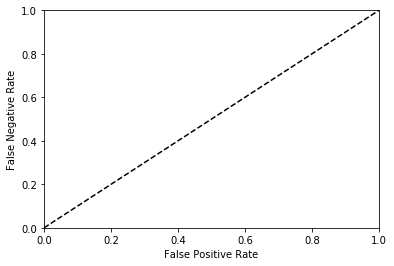

In [100]:
def plot_roc_curve( FPR_new,TPR_new):

    plt.clf()
    plt.plot(FPR_new, TPR_new, linewidth=2)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("False Negative Rate")

plot_roc_curve(fp_rate, TPR)
plt.show()

In [101]:
from sklearn.metrics import roc_curve

In [102]:
import sklearn.metrics as metrics

In [103]:
roc_auc = metrics.auc(FPR_new, TPR_new)

TypeError: Singleton array 0.3400000000000001 cannot be considered a valid collection.

In [104]:
roc_auc

NameError: name 'roc_auc' is not defined

In [105]:
from sklearn.metrics import roc_curve, auc
# fpr, tpr, thresholds = roc_curve(actual, pred_list)
fpr = FPR_new
tpr = TPR_new
roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % 50)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

TypeError: Singleton array 0.3400000000000001 cannot be considered a valid collection.

In [106]:
FPR_new

0.3400000000000001

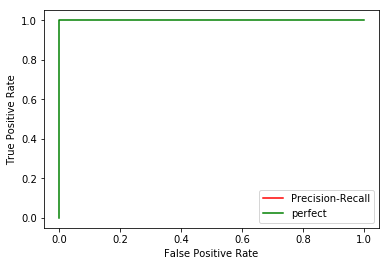

In [107]:
import matplotlib.pyplot as plt
plt.plot(FPR_new, TPR_new,'r-',label = 'Precision-Recall')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [108]:
# confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
# print (confusion_matrix)

In [109]:
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print("CM :",cm[0][1])
    FP = cm[0][0]
    TN = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]
    print('True positive = ', TP)
    print('False positive = ', FP)
    print('False negative = ', FN)
    print('True negative = ', TN)
    return TP,FP,FN,TN

In [125]:
pred= [1,1,1,0,0]

In [126]:
TP, FP, FN ,TN = print_confusion_matrix(actual, pred)

CM : 0
True positive =  3
False positive =  0
False negative =  2
True negative =  0


In [127]:
a = confusion_matrix(actual,pred)

In [128]:
a

array([[0, 0],
       [2, 3]], dtype=int64)

In [129]:
import seaborn as sn
import matplotlib.pyplot as plt

In [130]:
# df_cm = pd.DataFrame(confusion_matrix, range(2),
#                   range(2))
# df_cm.index.name = 'Actual'
# df_cm.columns.name = 'Predicted'
# plt.figure(figsize = (10,7))
# sn.set(font_scale=1.4)#for label size
# sn.heatmap(df_cm, annot=True,annot_kws={"size": 20})# font size

In [131]:
print(TP)

3


In [132]:
precision = TP / (TP + FP)
recall = TP / (TP+FN)
F_Score = (2*precision*recall)/(precision+recall)

In [133]:
precision

1.0

In [134]:
recall

0.6

In [135]:
F_Score

0.7499999999999999

In [136]:
data = {'Precision':precision,'Recall':recall,'F-Score':F_Score}
pd.DataFrame.from_dict(data, orient='index',columns=[ 'Values'])

,Values
Precision,1.00
Recall,0.60
F-Score,0.75


In [137]:
inverse_precision = TN / (FN+TN)
inverse_recall = TN / (FP+TN)
markedness = precision + inverse_precision - 1
informedness = recall + inverse_recall - 1

C:\Users\tusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in longlong_scalars
  


In [138]:
import math

In [139]:
a = (TP+FN)

In [140]:
b = math.sqrt((TP+FN)*(FP+TN)*(TP+FP)*(FN+TN))

In [141]:
MCC = ((TP*TN) - (FN*FP))//b

C:\Users\tusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in floor_divide
  """Entry point for launching an IPython kernel.


In [142]:
inverse_precision

0.0

In [143]:
inverse_recall

nan

In [144]:
markedness

0.0

In [145]:
informedness

nan

In [146]:
MCC

nan

In [147]:
user_val

38095662